0.1 1.3
0.1 1.3051020408163265
0.1 1.310204081632653
0.1 1.3153061224489797
0.1 1.3204081632653062
0.1 1.3255102040816327
0.1 1.3306122448979592
0.1 1.3357142857142859
0.1 1.3408163265306123
0.1 1.3459183673469388
0.1 1.3510204081632653
0.1 1.3561224489795918
0.1 1.3612244897959185
0.1 1.366326530612245
0.1 1.3714285714285714
0.1 1.376530612244898
0.1 1.3816326530612246
0.1 1.386734693877551
0.1 1.3918367346938776
0.1 1.396938775510204
0.1 1.4020408163265305
0.1 1.4071428571428573
0.1 1.4122448979591837
0.1 1.4173469387755102
0.1 1.4224489795918367
0.1 1.4275510204081634
0.1 1.4326530612244899
0.1 1.4377551020408164
0.1 1.4428571428571428
0.1 1.4479591836734693
0.1 1.453061224489796
0.1 1.4581632653061225
0.1 1.463265306122449
0.1 1.4683673469387755
0.1 1.4734693877551022
0.1 1.4785714285714286
0.1 1.4836734693877551
0.1 1.4887755102040816
0.1 1.4938775510204083
0.1 1.4989795918367348
0.1 1.5040816326530613
0.1 1.5091836734693878
0.1 1.5142857142857142
0.1 1.519387755102041
0.1 1.52448

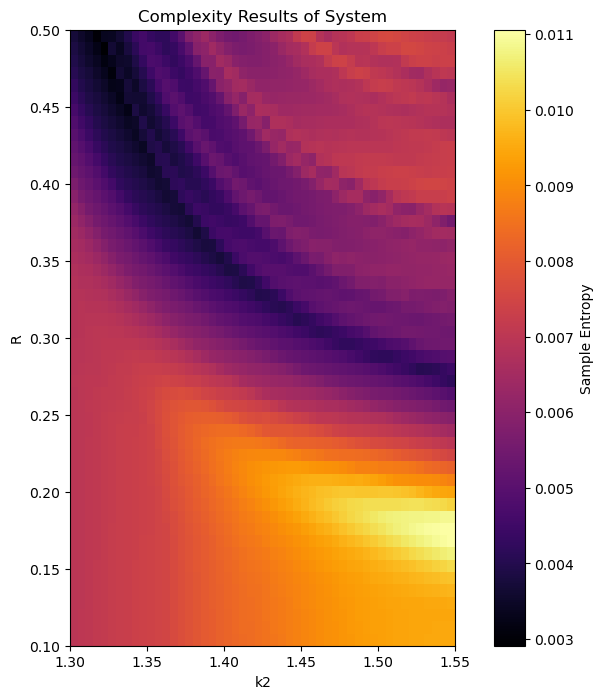

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pyentrp import entropy as ent

def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

a = 0.3
b = 0.3
c = 2
d = 0.8
k2_values = np.linspace(0.1, 0.5, 50)  # or adjust as needed
R_values = np.linspace(1.3, 1.55, 50)  # or adjust as needed
t = np.arange(0.0, 100.0, 0.01)

results = []

for k2 in k2_values:
    row = []
    for R in R_values:
        print(f"{k2} {R}")
        initial_conditions = [k2, 0.3, 0.3, 0.3]
        sol = odeint(system, initial_conditions, t, args=(a, b, c, d, R))
        sam_entropy = ent.sample_entropy(sol[:, 3], 4, 0.2 * np.std(sol[:,3]))
        row.append(sam_entropy[1])
    results.append(row)

transposed = list(map(list, zip(*results)))
plt.figure(figsize=(10, 8))
plt.imshow(transposed, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k2')
plt.ylabel('R')
plt.title('Complexity Results of System')
plt.show()
